<center><img src='img/ms_logo.jpeg' height=40% width=40%></center>

<center><h1>Clustering</h1></center>

In this lesson, we're going to explore another classic Unsupervised Learning technique--**_K-Means Clustering_**.  We'll be working off the same datasets we used in our PCA lesson, and we'll be reusing some of the same code as well. 

<center><h3>What is Clustering?</h3></center>

As the name implies, Clustering refers to a group of unsupervised learning algorithms used for clustering your dataset into a number of subgroups.  In the real world, this is used for things like [customer segmentation](http://searchsalesforce.techtarget.com/definition/customer-segmentation). Clustering is often useful because, as an Unsupervised Learning algorithm, it does not require labeled data in order to work.  The strong majority of data that exists in the world is unlabeled, and obtaining labels is often time-consuming and expensive.  This is both a benefit and a drawback of Unsupervised Learning--the lack of labels means we're able to apply it to much more data, but it also means we have no way of validating the performance of our model as we do in with Supervised Learning algorithms.  

There are [many clustering algorithms](http://scikit-learn.org/stable/modules/clustering.html), but the one we'll be exploring today is considered one of the classics: K-means Clustering.  

**_Challenge:_** Read [this article](https://www.datascience.com/blog/k-means-clustering) on K-means clustering to get a better grasp of how the algorithm works.  


<center><h3>The Datasets</h3></center>

For this notebook, we'll start by applying the K-means Clustering algorithm to both the `Iris` dataset and the `Wholesale Customers` dataset that we used in the PCA notebook.  For each data set, we'll apply K-means clustering to the raw data, and then to same dataset transformed by PCA to see if there are any noticeable differences.  



<center><h3>How to Make it All Work</h3></center>

This activity requires us to do a decent bit of data transformation, and to get our hands dirty with Matplotlib.  To make this easier, follown these steps:

**_Challenge:_** Visualize K-Means Clustering on the Iris Data Set.  

In order to accomplish this challenge, follow these steps:

1.  Run all the import statements below.  

2.  Import the iris dataset using `load_iris()`.  Then, split the data and target into different variables.  

3.  Import a `StandardScaler()` object, and `fit()` the scaler object to the data.  

4.  Use the scaler object to `transform` the data from the iris data set.  Store the scaled data it returns in `scaled_data`.  

5.  Create a `KMeans()` object.  Make sure you set the `n_clusters` parameter to `3` during this step.  

6.  Visualize the results of the K-Means Clustering using a scatterplot object, with the color for each data point denoted by the label it was assigned by the `KMeans()` object during the `fit()` step.  Do this by running the cell below to create a basic visualization.  **Add labels to each axis to make it clear what features we're visualizing.**

7.  Extend the code in visualization cell so that it outputs multiple graphs--one for every combination of feature pairs.  (**Hint:** You can script this very easily--consider turning it into a function!)

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler


iris = load_iris()
raw_data = iris.data
labels = iris.target
scaler = StandardScaler()
 

# Fit the scaler to the data contained in 'raw_data'
scaler.fit(raw_data)

# Use scaler.transform() on the raw_data and store the results below
scaled_data = scaler.transform(raw_data)
k_means = KMeans(n_clusters=3)


centroids = output.cluster_centers_
scaled_unique_labels = 3



# Fit the k_means object to the scaled data, and store the results it returns below
output = k_means.fit(scaled_data)


In [123]:
from itertools import permutations

def _create_array_of_feature_tuples(DATA_SHAPE):
    """ Helper function that inputs integer representing number of columns in dataset 
    and outputs iterable NumPy array of tuples holding dataset feature indices. """
    return [permutation for permutation in permutations(range(DATA_SHAPE), 2)]

In [124]:
def _produce_cluster_on_subplot(feature_index_pair, subplot, centroids, unique_labels):
    """ Helper function that inputs tuple of indices for specific feature pair and MatPlotLib subplot object
    and outputs appropriate scatterplot of K-Means feature clusters over subplot. """
    col_index1, col_index2 = feature_index_pair[0], feature_index_pair[1]
    subplot.scatter(scaled_data[:, col_index1], scaled_data[:, col_index2], c=unique_labels, cmap="viridis")
    subplot.set_xlabel("FEATURE {}".format(col_index1 + 1))
    subplot.set_ylabel("FEATURE {}".format(col_index2 + 1))
    subplot.scatter(centroids[:, col_index1], centroids[:, col_index2], c="black", s=200, alpha=0.5)
    return

In [125]:


# def pair_clusters(dataset, centroids, unique_labels, figsize=(18, 15)):
#     """ Function that inputs two dataset column indices 
#     and outputs a formatted series of cluster plots from the index-referenced feature pairs. """
#     DATA_SHAPE = dataset.shape[1]
#     feature_tuples = _create_array_of_feature_tuples(DATA_SHAPE)
#     LEN_FEATURE_PAIRS = len(feature_tuples)
#     SUBPLOT_SHAPE = int(LEN_FEATURE_PAIRS / DATA_SHAPE)
    
#     # Produces subplots sequence layout as referential objects
#     fig, axs = plt.subplots(DATA_SHAPE, SUBPLOT_SHAPE, figsize=figsize)
#     fig.subplots_adjust(hspace=0.5)
    
#     print("\nConstructing {}x{} subplot sequence.".format(DATA_SHAPE, SUBPLOT_SHAPE)) 
#     print("> TOTAL FEATURES: {}".format(DATA_SHAPE))
#     print("> FEATURE PAIR PERMUTATIONS: {}".format(LEN_FEATURE_PAIRS))
#     print("> CLUSTERS FOUND: {}\n".format(len(centroids)))
    
#     # Converts axes object to enumerated array and iteratively produces clustered graphs on each subplot
#     for index, subplot in enumerate(axs.flatten()):
#         _produce_cluster_on_subplot(feature_tuples[index], subplot, centroids, unique_labels)
        
# # Graphs scaled dataset on subplot sequence
# pair_clusters(scaled_data, centroids_scaled, scaled_unique_labels) 

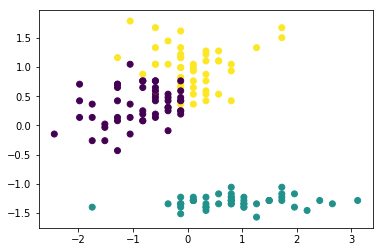

In [126]:
# TODO: Extend this code so that you can output a graph for every feature pair in the scaled data.  

# (HINT: Take a look at the pattern for passing the data in the 'scatter()' call.  In the square brackets [:, 1], 
# the ':,' gets us all 150 rows of data, while the '1' tells us to only get the data in the first column for each row. 
# Use this knowledge to figure out how to write a script that visualizes all possible comparison for the 4 columns.)
plt.figure('3 Cluster K-Means')
plt.scatter(scaled_data[:, 1], scaled_data[:, 2], c=output.labels_)


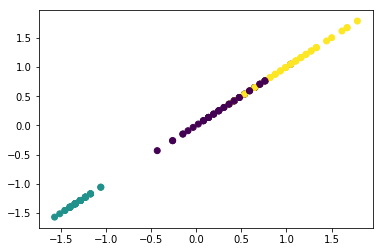

In [127]:
plt.scatter(scaled_data[:, 2], scaled_data[:, 2], c=output.labels_)

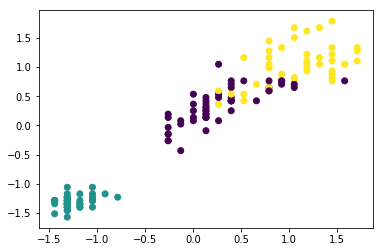

In [128]:
plt.scatter(scaled_data[:, 3], scaled_data[:, 2], c=output.labels_)

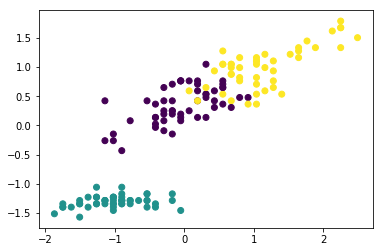

In [129]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 2], c=output.labels_)

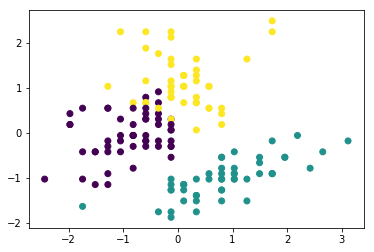

In [130]:
plt.scatter(scaled_data[:, 1], scaled_data[:, 0], c=output.labels_)

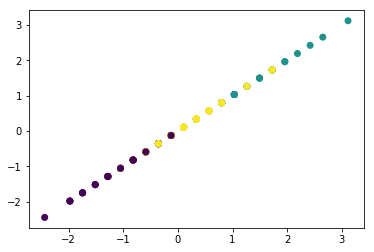

In [131]:
plt.scatter(scaled_data[:, 1], scaled_data[:, 1], c=output.labels_)

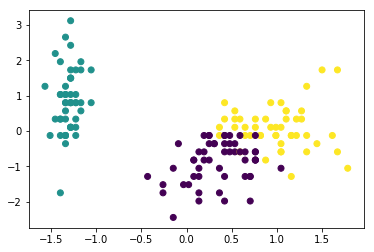

In [132]:
plt.scatter(scaled_data[:, 2], scaled_data[:, 1], c=output.labels_)

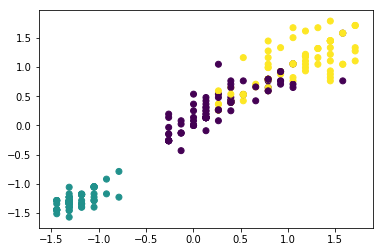

In [133]:
# plt.scatter(scaled_data[:, 3], scaled_data[:, 0], c=output.labels_)
# plt.scatter(scaled_data[:, 3], scaled_data[:, 1], c=output.labels_)
plt.scatter(scaled_data[:, 3], scaled_data[:, 2], c=output.labels_)
plt.scatter(scaled_data[:, 3], scaled_data[:, 3], c=output.labels_)

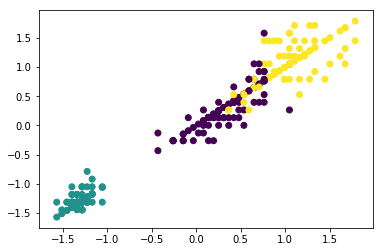

In [134]:
# plt.scatter(scaled_data[:, 2], scaled_data[:, 0], c=output.labels_)
# plt.scatter(scaled_data[:, 2], scaled_data[:, 1], c=output.labels_)
plt.scatter(scaled_data[:, 2], scaled_data[:, 2], c=output.labels_)
plt.scatter(scaled_data[:, 2], scaled_data[:, 3], c=output.labels_)

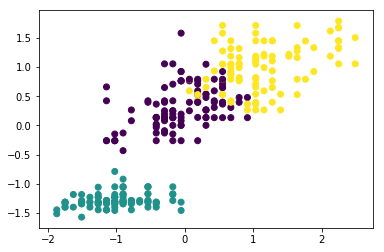

In [135]:
# plt.scatter(scaled_data[:, 0], scaled_data[:, 0], c=output.labels_)
# plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=output.labels_)
plt.scatter(scaled_data[:, 0], scaled_data[:, 2], c=output.labels_)
plt.scatter(scaled_data[:, 0], scaled_data[:, 3], c=output.labels_)

<center><h3>Using K-Means Cluster on Data Transformed by PCA</h3></center>

Now that we have created our first K-Means clusters on the data set, we'll transform our data using PCA and reduce the overall dimensionality of the dataset.  Once we've done that, we'll use K-Means clustering as we did above on our newly transformed data, and compare our results.  

**_Challenge:_**  Transform the data into Principal Components for  use in K-Means Clustering.

1.  Import a `PCA()` object.  Call `.fit()` to fit the object on the data stored in `scaled_data`.

2.  Use the pca object's `transform()` method on the scaled data.  Store the results in `pca_data`.

3.  Create a new `KMeans()` object, with the `n_clusters` parameter set to 3, and then `fit()` it to the data is `pca_data`.  Store the results in `pca_k_means`.

4.  Use the function you created above to visualize the results of the K-Means clustering on the first two Principal Components contained within `pca_data`.  

When you've finished, answer the following questions:

**_1.) Which do you think is more accurate--the results from clustering on the scaled data, or on the Principal Components?_**

**_Did the variance lost from dropping the 3rd and 4th principal components affect our ability to cluster the data? How might you tell?_**



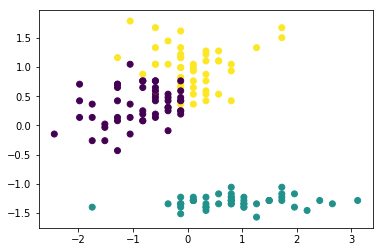

In [136]:
from sklearn.decomposition import PCA

pca = PCA()

# call pca.fit() on the data stored in 'scaled_data'.
pca.fit(scaled_data)

# Call pca.transform() on 'scaled_data' and store the results below.  
pca_data = pca.transform(scaled_data)

# When you initialize the object below, make sure 'n_cluster=3'
pca_k_means = KMeans(n_clusters=3)

# Fit the pca_k_means object to the data in 'pca_data'.
pca_k_means.fit(pca_data)

# Use the function you wrote above to visualize the results of the clustering across the first and second 
# Principal components in pca_data. 

plt.figure('3 Cluster K-Means')
plt.scatter(scaled_data[:, 1], scaled_data[:, 2], c=output.labels_)

<center><h3>Checking our Accuracy</h3></center>

Although we don't normally have this luxury in the real world, in this case, we have the ground truth labels to check how accurate our Unsupervised Learning algorithm actually did.  Remember that we have the labels for each data point stored inside our aptly named `labels` variable, where the value at each index is the label for the corresponding data stored inside our data objects.  Although we have transformed our data (several times), we haven't changed the order of anything, so these labels still hold true.  

Now, we'll compare the clusters each data point was assigned to the actual labels.

**_Challenge:_** Iterate through the results in `.labels` for each k_means object, and compare the results to the ground truth found in `labels`.  Create a confusion matrix for each, and calculate the accuracy rate.  


**_Stretch Challenge:_** Create a 3 x 3 confusion matrix, and track _how_ each incorrect instance is wrong--for instance, when a 0 is predicted as a 2 is different than a 2 being predicted as a 0.  The output of this function should be a 3 x 3 matrix, Where the rows represent the predicted class and the columns represent the actual class.  


<center><h2>K-Means, but Without All the Supervision</h2></center>

For the remainder of this notebook, your task is to do all the same things we did for the `iris` dataset, but instead for the `wholesale_customers` dataset contained in the `datasets` folder.  Pay attention to the workflow we used above to complete this task on your own.  

**_Challenge:_** Use K-Means clustering on the `wholesale_customers` dataset, and then again on a version of this dataset transformed by PCA.  

1. Read in the data from the `wholesale_customers_data.csv` file contained within the datasets folder.  

2. Store the `Channel` column in a separate variable, and then drop the `Region` and `Channel` columns from the dataframe.  `Channel` will act as our labels to tell us what class of customer each datapoint actually is, in case we want to check the accuracy of our clustering.  

3.  Scale the data, fit a k-means object to it, and then visualize the data and the clustering.  

4.  Use PCA to transform the data, and then use k-means clustering on it to see if our results are any better.  

**_Stretch Challenge:_** Use the confusion matrix function you wrote in the previous stretch challenge to create a confusion matrix and see how accurate our clustering algorithms were.  Which did better--scaled data, or data transformed by PCA?

**

In [137]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# dataset is called 'wholesale_customers_data.csv', and can be found in the 'datasets' folder
customers_df = pd.read_csv('datasets/wholesale_customers_data.csv')

channel_labels = customers_df['Channel']

# Be sure to drop Region and Channel columns from the dataframe!
customers_df = customers_df.drop('Channel', axis=1)
customers_df = customers_df.drop('Region', axis=1)
customers_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
7,7579,4956,9426,1669,3321,2566
8,5963,3648,6192,425,1716,750
9,6006,11093,18881,1159,7425,2098


In [138]:
iris = load_iris()
X_sample = iris.data

scaler = StandardScaler()
 

# Fit the scaler to the data contained in 'data'
scaler.fit(X_sample)

# Use scaler.transform() on the raw_data and store the results below
scaled_data = scaler.transform(X_sample)

# Store the labels contained in iris.targets below
labels = iris.target

k_means = KMeans(n_clusters=3)



# Fit the k_means object to the scaled data, and store the results it returns below
output = k_means.fit(scaled_data)
output

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

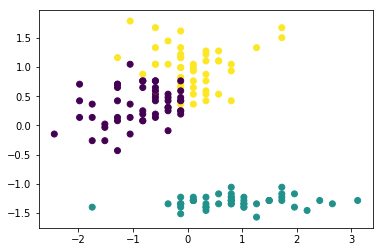

In [139]:
from sklearn.decomposition import PCA

pca = PCA()

# call pca.fit() on the data stored in 'scaled_data'.
pca.fit(scaled_data)

# Call pca.transform() on 'scaled_data' and store the results below.  
pca_data = pca.transform(scaled_data)

# When you initialize the object below, make sure 'n_cluster=3'
pca_k_means = KMeans(n_clusters=3)

# Fit the pca_k_means object to the data in 'pca_data'.
pca_k_means.fit(pca_data)

# Use the function you wrote above to visualize the results of the clustering across the first and second 
# Principal components in pca_data. 

plt.figure('3 Cluster K-Means')
plt.scatter(scaled_data[:, 1], scaled_data[:, 2], c=output.labels_)

In [140]:
variance = pca.explained_variance_ratio_

# Enumerate through pca.explained_variance_ratio_ to see the amount of variance captured by each Principal Component
for ind, var in enumerate(variance):
    print("Explained Variance for Principal Component {}: {}".format(ind, var))

Explained Variance for Principal Component 0: 0.7277045209380135
Explained Variance for Principal Component 1: 0.2303052326768063
Explained Variance for Principal Component 2: 0.03683831957627394
Explained Variance for Principal Component 3: 0.005151926808906321


In [141]:
df_pca = pd.DataFrame(pca_data, columns = ['Fresh', 'Milk', 'Grocery', 'Frozer'] )
df_pca

,Fresh,Milk,Grocery,Frozer
0,-2.264542,0.505704,-0.121943,-0.023073
1,-2.086426,-0.655405,-0.227251,-0.103208
2,-2.367950,-0.318477,0.051480,-0.027825
3,-2.304197,-0.575368,0.098860,0.066311
4,-2.388777,0.674767,0.021428,0.037397
5,-2.070537,1.518549,0.030684,-0.004399
6,-2.445711,0.074563,0.342198,0.038097
7,-2.233842,0.247614,-0.082574,0.025505
8,-2.341958,-1.095146,0.153562,0.026794
9,-2.188676,-0.448629,-0.246560,0.039907


In [142]:
train_test_split(pca_data, labels)

[array([[ 1.88425185e+00,  4.14332758e-01,  2.45485540e-02,
         -1.46296964e-01],
        [ 1.15318981e+00, -7.01326114e-01,  5.31464635e-01,
          4.04135807e-02],
        [ 1.36590943e+00,  6.93948040e-01,  2.83279516e-01,
         -1.07010918e-01],
        [-2.14455443e+00, -4.83942097e-01, -6.78557607e-02,
          4.83787691e-02],
        [-2.55783442e+00, -4.53816380e-01,  3.13571838e-01,
          6.74111170e-02],
        [ 2.30300590e+00,  4.09516695e-01, -6.54166687e-01,
          2.37212798e-01],
        [-2.22408272e+00, -7.09118158e-01, -2.23214514e-01,
         -2.63061382e-03],
        [ 2.20634950e+00,  5.54470105e-01, -2.05495910e-01,
         -5.93004996e-02],
        [ 6.62126138e-01, -2.24346071e-01,  8.73681069e-02,
          3.63525363e-02],
        [ 1.03587821e+00, -1.39246648e+00, -6.85434303e-01,
         -1.39128619e-01],
        [ 4.38730118e-01, -5.88812850e-02,  2.06703491e-01,
         -3.98514578e-02],
        [ 5.51633981e-01, -1.77258156e+00, 

In [143]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(pca_data, labels)
reg_X_train, reg_X_test, reg_y_train, reg_y_test = train_test_split(pca_data, labels)

clf = DecisionTreeClassifier()
clf_for_pca = DecisionTreeClassifier()

# Fit both models on the appropriate datasets
clf.fit(reg_X_train, reg_y_train)
clf_for_pca.fit(pca_X_train, pca_y_train)

# Use each fitted model to make predictions on the appropriate test sets
reg_pred = clf.predict(reg_X_test)
pca_pred = clf_for_pca.predict(pca_X_test)

print("Accuracy for regular model: {}".format(accuracy_score(reg_y_test, reg_pred)))
print("Accuracy for model with PCA: {}".format(accuracy_score(pca_y_test, pca_pred)))

Accuracy for regular model: 0.9473684210526315
Accuracy for model with PCA: 0.9210526315789473
